### Analisis Finanzas 
#### Segundo desafio
¬øLos clientes con pr√©stamos e hipotecas tienden a tener un saldo medio m√°s bajo o m√°s riesgo de incumplimiento? ¬øC√≥mo deber√≠amos ajustar nuestras ofertas y estrategias de gesti√≥n de riesgos en funci√≥n de estos hallazgos?

#### Librerias y m√°s

In [40]:
"""Librer√≠as que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # An√°lisis y manipulaci√≥n de datos en tablas
import numpy as np                  # C√°lculos num√©ricos y matrices
import os                           # Gesti√≥n de rutas de archivos
import re                           # Expresiones regulares para b√∫squeda y manipulaci√≥n de texto

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt     # Gr√°ficos b√°sicos en 2D
from matplotlib.ticker import FuncFormatter
import seaborn as sns               # Gr√°ficos estad√≠sticos mejorados
import plotly.express as px         # Gr√°ficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gr√°ficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualizaci√≥n de diagramas de "treemap"

# Procesado y an√°lisis
from scipy import stats
from scipy.stats import chi2_contingency, norm, ttest_ind, f_oneway # Pruebas de hip√≥tesis y an√°lisis estad√≠stico
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings("ignore")#ignorar advertencias

#Paleta de colores oficial
custom_palette = [ "#2CCED1", "#5F6F81", "#AABBC8", "#DCE3EA", "#2E2F36"]

#### Carga de datos

In [2]:
df = pd.read_csv('../Data/df_250519.csv')

#### Tabla relacion Prestamos e hipotecas
Se analiza si tiene prestamo, si tiene hipoteca, Saldo medio y tasa de incumplimiento

   Tiene pr√©stamo  Tiene hipoteca  Saldo medio  Tasa incumplimiento  \
0           False           False  1844.047228             0.008864   
1           False            True  1365.205982             0.013876   
2            True           False   801.467991             0.057395   
3            True            True   773.169967             0.026403   

   N√∫mero de clientes  
0                7559  
1                6486  
2                 906  
3                1212  


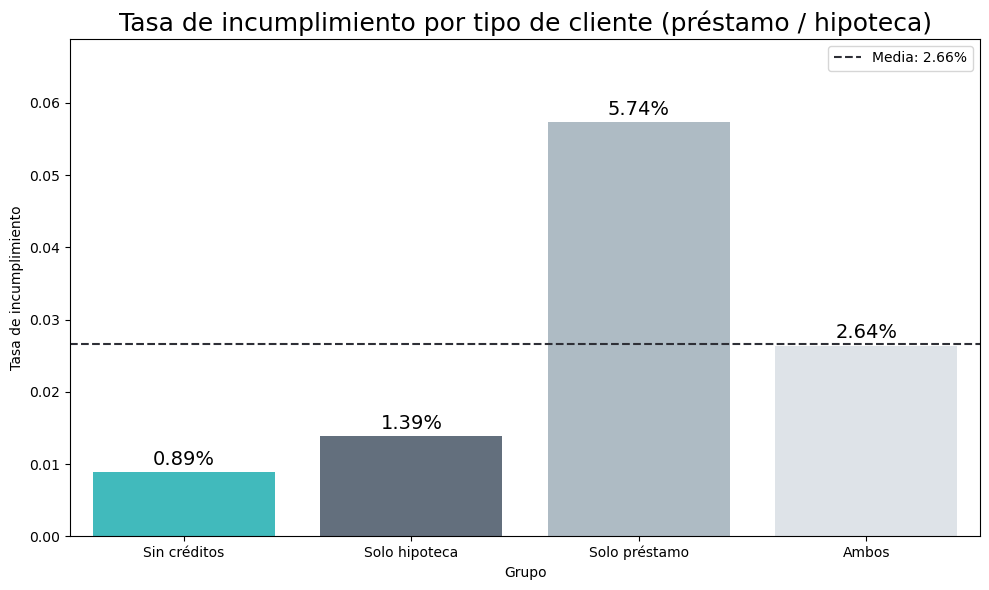

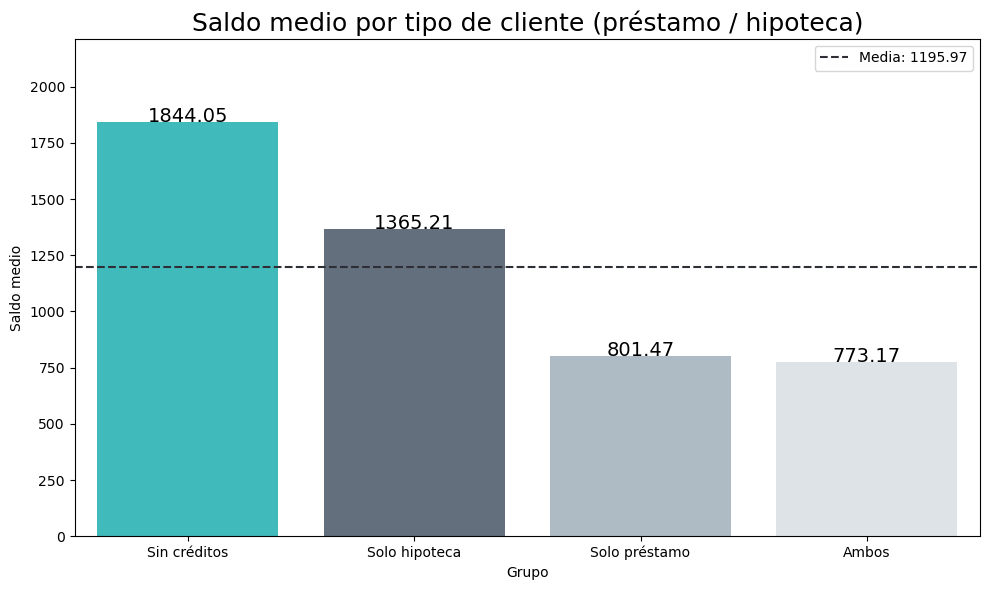

In [3]:
Tabla_agrupada = df.groupby(['loan', 'housing']).agg({'balance': 'mean','default': 'mean','id': 'count'}).reset_index()
Tabla_agrupada.columns = ['Tiene pr√©stamo', 'Tiene hipoteca', 'Saldo medio', 'Tasa incumplimiento', 'N√∫mero de clientes'] 
print(Tabla_agrupada)

'''Esteos graficos se puede cambiar de orden para mostrarlos de manera inversa 
prestamo como Hue y hipoteca como x

sns.barplot(data=Tabla_agrupada, x='Tiene pr√©stamo', y='Tasa incumplimiento', hue='Tiene hipoteca', palette=custom_palette)
plt.title("Tasa de incumplimiento por tipo de pr√©stamo e hipoteca")
plt.ylabel("Tasa de incumplimiento")
plt.show()

sns.barplot(data=Tabla_agrupada, x='Tiene pr√©stamo', y='Saldo medio', hue='Tiene hipoteca', palette=custom_palette)
plt.title("Saldo por tipo de pr√©stamo e hipoteca")
plt.ylabel("Saldo")
plt.show()'''

# Barras combinadas tasa de incumplimiento
df_viz = Tabla_agrupada.copy()
def clasificar_cliente(row):
    if row['Tiene pr√©stamo'] and row['Tiene hipoteca']:
        return "Ambos"
    elif row['Tiene pr√©stamo'] and not row['Tiene hipoteca']:
        return "Solo pr√©stamo"
    elif not row['Tiene pr√©stamo'] and row['Tiene hipoteca']:
        return "Solo hipoteca"
    else:
        return "Sin cr√©ditos"
    
media_tasa = df_viz['Tasa incumplimiento'].mean()
media_saldo = df_viz['Saldo medio'].mean()
df_viz['Grupo'] = df_viz.apply(clasificar_cliente, axis=1)
# Ordenar los grupos
orden = ["Sin cr√©ditos", "Solo hipoteca","Solo pr√©stamo", "Ambos" ]
df_viz['Grupo'] = pd.Categorical(df_viz['Grupo'], categories=orden, ordered=True)
df_viz = df_viz.sort_values('Grupo')

plt.figure(figsize=(10,6))
sns.barplot(x='Grupo', y='Tasa incumplimiento', data=df_viz, palette= custom_palette)

plt.title('Tasa de incumplimiento por tipo de cliente (pr√©stamo / hipoteca)', fontsize=18)
plt.ylabel('Tasa de incumplimiento')
plt.ylim(0, df_viz['Tasa incumplimiento'].max()*1.2)

for idx, (_, row) in enumerate(df_viz.iterrows()):
    plt.text(idx, row['Tasa incumplimiento'] + 0.001, f"{row['Tasa incumplimiento']:.2%}", ha='center', fontsize=14)
plt.axhline(media_tasa, color="#2E2F36", linestyle='--', linewidth=1.5, label=f'Media: {media_tasa:.2%}')
plt.legend()
plt.tight_layout()
plt.show()

#barras combinadas saldo medio
orden2 = [ "Sin cr√©ditos", "Solo hipoteca","Solo pr√©stamo", "Ambos"]
df_viz['Grupo'] = pd.Categorical(df_viz['Grupo'], categories=orden2, ordered=True)
df_viz = df_viz.sort_values('Grupo')
plt.figure(figsize=(10,6))  
sns.barplot(x='Grupo', y='Saldo medio', data=df_viz, palette= custom_palette)
plt.title('Saldo medio por tipo de cliente (pr√©stamo / hipoteca)', fontsize=18)
plt.ylabel('Saldo medio')
plt.ylim(0, df_viz['Saldo medio'].max()*1.2)
for idx, (_, row) in enumerate(df_viz.iterrows()):
    plt.text(idx, row['Saldo medio'] + 0.001, f"{row['Saldo medio']:.2f}", ha='center', fontsize=14)
plt.axhline(media_saldo, color="#2E2F36", linestyle='--', linewidth=1.5, label=f'Media: {media_saldo:.2f}')
plt.legend()
plt.tight_layout()
plt.show()    

### Graficos de burbuja Finales

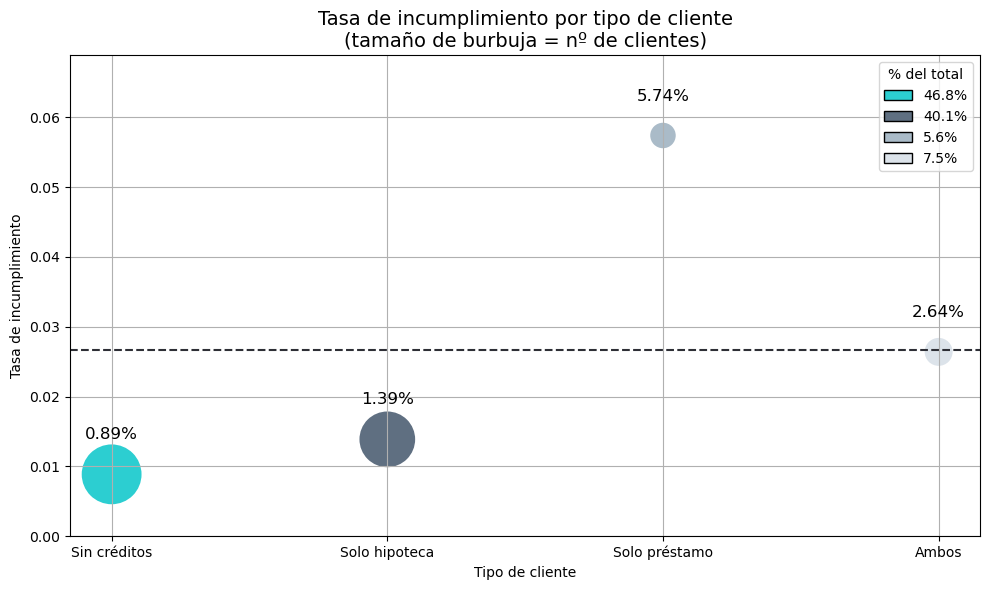

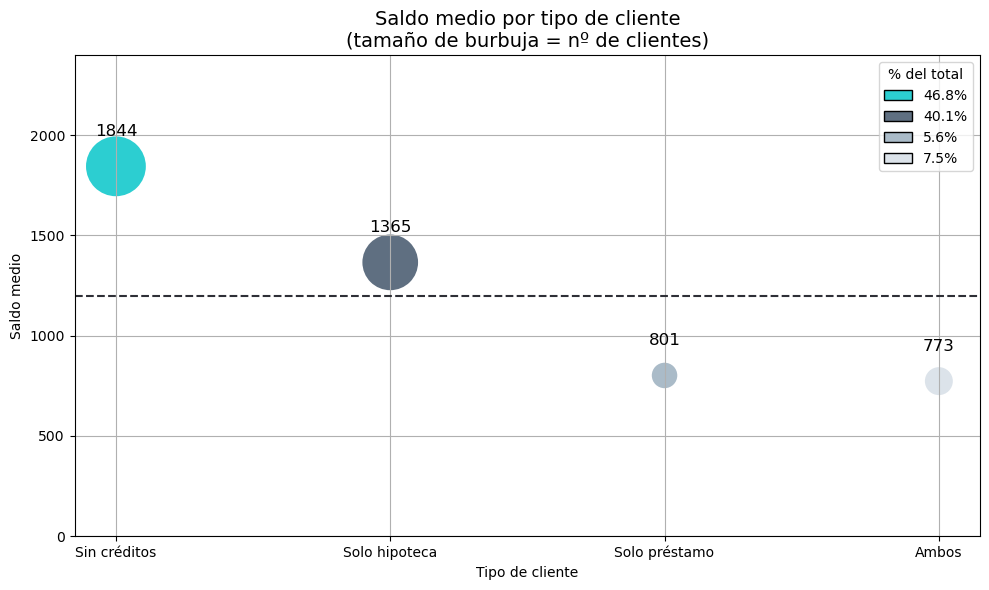

In [41]:
df_viz['Grupo'] = pd.Categorical(df_viz['Grupo'], categories=orden, ordered=True)
df_viz = df_viz.sort_values('Grupo')
media_tasa = df_viz['Tasa incumplimiento'].mean()
total_clientes = df_viz['N√∫mero de clientes'].sum()
df_viz['Porcentaje clientes'] = df_viz['N√∫mero de clientes'] / total_clientes

# Crear gr√°fico de burbujas para tasa de incumplimiento
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_viz,
    x='Grupo',
    y='Tasa incumplimiento',
    size='N√∫mero de clientes',
    hue='Grupo',
    sizes=(400, 2000),
    palette=custom_palette,
    legend=False,
)

# Agregar l√≠nea de media
plt.axhline(media_tasa, color="#2E2F36", linestyle='--', linewidth=1.5, label=f'Media: {media_tasa:.2%}')
# etiqueta sobre burbujas
for i, row in enumerate(df_viz.itertuples()):
    plt.text(i, row._4 + 0.005, f"{row._4:.2%}", ha='center', fontsize=12)

# Crear leyenda personalizada con colores y porcentajes
color_dict = dict(zip(df_viz['Grupo'], sns.color_palette(custom_palette)))
legend_elements = [
    Patch(
        facecolor=color_dict[row['Grupo']],
        edgecolor='black',
        label=f"{row['Porcentaje clientes']:.1%}"
    )
    for _, row in df_viz.iterrows()
]

# Mostrar leyenda personalizada
plt.legend(
    handles=legend_elements,
    title="% del total",
    loc='upper right'
)
plt.title("Tasa de incumplimiento por tipo de cliente\n(tama√±o de burbuja = n¬∫ de clientes)", fontsize=14)
plt.xlabel("Tipo de cliente")
plt.ylabel("Tasa de incumplimiento")
plt.ylim(0, df_viz['Tasa incumplimiento'].max() * 1.2)
plt.tight_layout()
plt.grid(True)
plt.show()

# crear grafico de burbuja para saldo medio
df_viz['Grupo'] = pd.Categorical(df_viz['Grupo'], categories=orden2, ordered=True)
df_viz = df_viz.sort_values('Grupo')
plt.figure(figsize=(10,6))      
sns.scatterplot(
    data=df_viz,
    x='Grupo',
    y='Saldo medio',
    size='N√∫mero de clientes',
    hue='Grupo',
    sizes=(400, 2000),
    palette=custom_palette,
    legend=False,
)
# Agregar l√≠nea de media
plt.axhline(media_saldo, color="#2E2F36", linestyle='--', linewidth=1.5, label=f'Media: {media_saldo:.2f}')
# etiqueta sobre burbujas       
for i, row in enumerate(df_viz.itertuples()):
    plt.text(i, row._3 + 150, f"{row._3:.0f}", ha='center', fontsize=12)
# Crear leyenda personalizada con colores y porcentajes
color_dict = dict(zip(df_viz['Grupo'], sns.color_palette(custom_palette)))
legend_elements = [
    Patch(
        facecolor=color_dict[row['Grupo']],
        edgecolor='black',
        label=f"{row['Porcentaje clientes']:.1%}"
    )
    for _, row in df_viz.iterrows()
]
# Mostrar leyenda personalizada
plt.legend(
    handles=legend_elements,
    title="% del total",
    loc='upper right'
)
plt.title("Saldo medio por tipo de cliente\n(tama√±o de burbuja = n¬∫ de clientes)", fontsize=14)
plt.xlabel("Tipo de cliente")
plt.ylabel("Saldo medio")
plt.ylim(0, df_viz['Saldo medio'].max()*1.3)
plt.tight_layout()
plt.grid(True)
plt.show()

#### ANOVA y t-test por pares

### Odds Ratio
chances de incumplimiento al tener un prestamo o hipoteca
La raz√≥n de momios (odds ratio) se calcula as√≠:
odds ratio = odds de default en expuesto / odds de default en no expuestos.

donde :

odds de default en expuesto  = personas con inpago y con (prestamo, hipoteca) / personas sin inpago y con (prestamo, hipoteca)

odds de default en no expuestos = personas con inpago y sin (prestamo, hipoteca) / personas sin inpago y sin (prestamo, hipoteca)



#### Nota
use odds ratio en lugar de riesgo relativo pues tengo la intencion de hacer una regresion logistica si da tiempo

In [4]:
def odds_ratio(df, column_a, column_b):
    """Calcula la raz√≥n de probabilidades (odds ratio) entre dos grupos."""
    tabla_contingencia = pd.crosstab(df[column_a],df[column_b] )
    A= tabla_contingencia.iloc[1, 1] 
    B= tabla_contingencia.iloc[1, 0] 
    C= tabla_contingencia.iloc[0, 1]
    D= tabla_contingencia.iloc[0, 0]
    # Evitar divisiones por cero
    if B == 0 or D == 0:
        print("‚ö†Ô∏è Uno de los valores es cero, no se puede calcular la raz√≥n de momios.")
        return None
    odds_expuesto = A / B
    odds_no_expuesto = C / D
    odds_ratio = odds_expuesto /odds_no_expuesto
    print(f"üìä Tabla de contingencia entre '{column_a}' y '{column_b}':\n{tabla_contingencia}\n")
    print(f"odds_sin_{column_a}: {odds_expuesto}")
    print(f"odds_con_{column_a} : {odds_no_expuesto}")
    print(f"odds_ratio: {odds_ratio}")
    
# aplicar la funci√≥n a los datos
odds_ratio(df, 'loan', 'default')
odds_ratio(df, 'housing', 'default')


üìä Tabla de contingencia entre 'loan' y 'default':
default  False  True 
loan                 
False    13888    157
True      2034     84

odds_sin_loan: 0.04129793510324484
odds_con_loan : 0.011304723502304147
odds_ratio: 3.6531574695150595
üìä Tabla de contingencia entre 'housing' y 'default':
default  False  True 
housing              
False     8346    119
True      7576    122

odds_sin_housing: 0.016103484688489968
odds_con_housing : 0.014258327342439491
odds_ratio: 1.1294091026061956


### Calculo del intervalo de confianza
calculado al 95% 

In [5]:
def calcular_odds_ratio_ic(df, columna_a, columna_b, alpha=0.05):
    tabla = pd.crosstab(df[columna_a], df[columna_b])
    
    # use true/false para evitar errores y confusiones
    A = tabla.loc[True, True]
    B = tabla.loc[True, False]  
    C = tabla.loc[False, True]
    D = tabla.loc[False, False]  
    odds_expuesto = A / B
    odds_no_expuesto = C / D
    OR = odds_expuesto /odds_no_expuesto

    # Log(OR) y error est√°ndar
    log_or = np.log(OR) # logaritmo natural de la raz√≥n de momios
    se_log_or = np.sqrt(1/A + 1/B + 1/C + 1/D) # error est√°ndar del logaritmo de la raz√≥n de momios
    # Intervalo de confianza
    z = norm.ppf(1 - alpha / 2) # valor cr√≠tico para el nivel de confianza
    lower = np.exp(log_or - z * se_log_or) # intervalo inferior
    upper = np.exp(log_or + z * se_log_or) # intervalo superior

    print(f"üìä Odds Ratio entre '{columna_a}' y '{columna_b}': {OR:.4f}")
    print(f"üîí Intervalo de confianza {int((1-alpha)*100)}%: [{lower:.4f}, {upper:.4f}]")
    
    

# Aplicar la funci√≥n a los datos
calcular_odds_ratio_ic(df, 'loan', 'default')
calcular_odds_ratio_ic(df, 'housing', 'default')

üìä Odds Ratio entre 'loan' y 'default': 3.6532
üîí Intervalo de confianza 95%: [2.7915, 4.7808]
üìä Odds Ratio entre 'housing' y 'default': 1.1294
üîí Intervalo de confianza 95%: [0.8757, 1.4566]


### Chi cuadrado
comprobar la relaciond variables categoricas

In [6]:
# Funci√≥n para ejecutar Chi-cuadrado entre default y una variable categ√≥rica
def Funcion_Chi2(df, column):
    Tabla_contingencia = pd.crosstab(df[column], df['default'])
    chi2, p, dof, expected = chi2_contingency(Tabla_contingencia)
    print(f"\nTest Chi-cuadrado entre '{column}' y 'default'")
    print("Tabla de contingencia:\n", Tabla_contingencia)
    print(f"Chi2 = {chi2:.4f}, p-valor = {p:.4f}, grados de libertad = {dof}")
    if p < 0.05:
        print("‚ùóHay evidencia estad√≠stica de asociaci√≥n entre las variables.")
    else:
        print("‚úÖ No se detecta asociaci√≥n estad√≠sticamente significativa.")

# Aplicar a 'loan' y 'housing'
Funcion_Chi2(df, 'loan')
Funcion_Chi2(df, 'housing')


Test Chi-cuadrado entre 'loan' y 'default'
Tabla de contingencia:
 default  False  True 
loan                 
False    13888    157
True      2034     84
Chi2 = 99.7154, p-valor = 0.0000, grados de libertad = 1
‚ùóHay evidencia estad√≠stica de asociaci√≥n entre las variables.

Test Chi-cuadrado entre 'housing' y 'default'
Tabla de contingencia:
 default  False  True 
housing              
False     8346    119
True      7576    122
Chi2 = 0.7622, p-valor = 0.3826, grados de libertad = 1
‚úÖ No se detecta asociaci√≥n estad√≠sticamente significativa.


### Representaci√≥n gr√°fica del saldo promedio por tipo de cliente en funci√≥n de pr√©stamos

In [7]:
saldo_medio_global = int(df['balance'].mean())

In [8]:
def categorize_credit(row):
    if not row['loan'] and not row['housing']:
        return 'Sin cr√©ditos'
    elif not row['loan'] and row['housing']:
        return 'S√≥lo hipoteca'
    elif row['loan'] and not row['housing']:
        return 'S√≥lo pr√©stamo'
    else:
        return 'Ambos'

df['categoria_credito'] = df.apply(categorize_credit, axis=1)

# Agrupar y calcular promedio de balance
balance_promedio = df.groupby('categoria_credito')['balance'].mean().reindex(['Sin cr√©ditos', 'S√≥lo hipoteca', 'S√≥lo pr√©stamo', 'Ambos'])
balance_promedio

categoria_credito
Sin cr√©ditos     1844.047228
S√≥lo hipoteca    1365.205982
S√≥lo pr√©stamo     801.467991
Ambos             773.169967
Name: balance, dtype: float64

In [9]:
clientes_por_categoria = df['categoria_credito'].value_counts().reindex(['Sin cr√©ditos', 'S√≥lo hipoteca', 'S√≥lo pr√©stamo', 'Ambos'])

# Crear DataFrame final
df_balance = pd.DataFrame({
    'balance_promedio': balance_promedio,
    'clientes_por_categoria': clientes_por_categoria
}).reset_index()

# Calcular porcentaje de clientes
total_clientes = clientes_por_categoria.sum()
df_balance['pct_clientes'] = (df_balance['clientes_por_categoria'] / total_clientes * 100).round(1)

df_balance

categoria_credito  balance_promedio  clientes_por_categoria  pct_clientes
0      Sin cr√©ditos       1844.047228                    7559          46.8
1     S√≥lo hipoteca       1365.205982                    6486          40.1
2     S√≥lo pr√©stamo        801.467991                     906           5.6
3             Ambos        773.169967                    1212           7.5

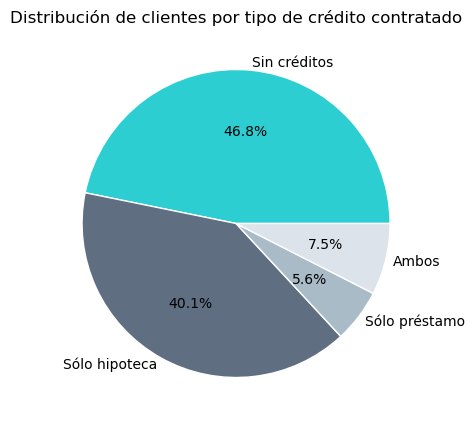

In [10]:
# Create a pieplot
plt.figure(figsize=(5, 5))
plt.pie(df_balance['pct_clientes'], labels=df_balance['categoria_credito'], labeldistance=1.05, autopct='%1.1f%%', colors=custom_palette, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title("Distribuci√≥n de clientes por tipo de cr√©dito contratado", loc='center')
plt.show()

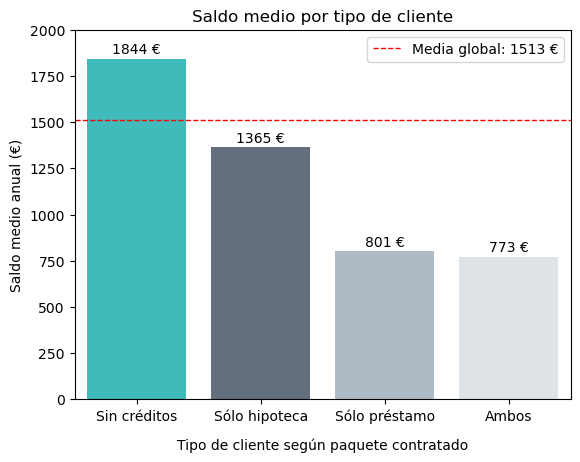

In [11]:
# Gr√°fica pandas
# balance_promedio.plot(kind='bar', color=custom_palette[:4])
# plt.xticks(rotation=0)

# Gr√°fica seaborn
df_balance = balance_promedio.reset_index()
df_balance.columns = ['Tipo de cliente', 'Saldo medio anual']

sns.barplot(data=df_balance, x='Tipo de cliente', y='Saldo medio anual', palette=custom_palette[:4])
plt.title("Saldo medio por tipo de cliente")
plt.ylabel("Saldo medio anual (‚Ç¨)")
plt.xlabel("Tipo de cliente seg√∫n paquete contratado", labelpad=10)
plt.xticks(rotation=0)
plt.ylim(0, 2000)

# L√≠nea punteada del saldo medio global
plt.axhline(saldo_medio_global, color='red', linestyle='--', linewidth=1, label=f"Media global: {saldo_medio_global} ‚Ç¨")

# A√±adir etiquetas en cada barra
for i, row in df_balance.iterrows():
    plt.text(i, row["Saldo medio anual"] + 10, f'{int(row["Saldo medio anual"])} ‚Ç¨', color='black', ha='center', va='bottom')

plt.legend()
plt.show()

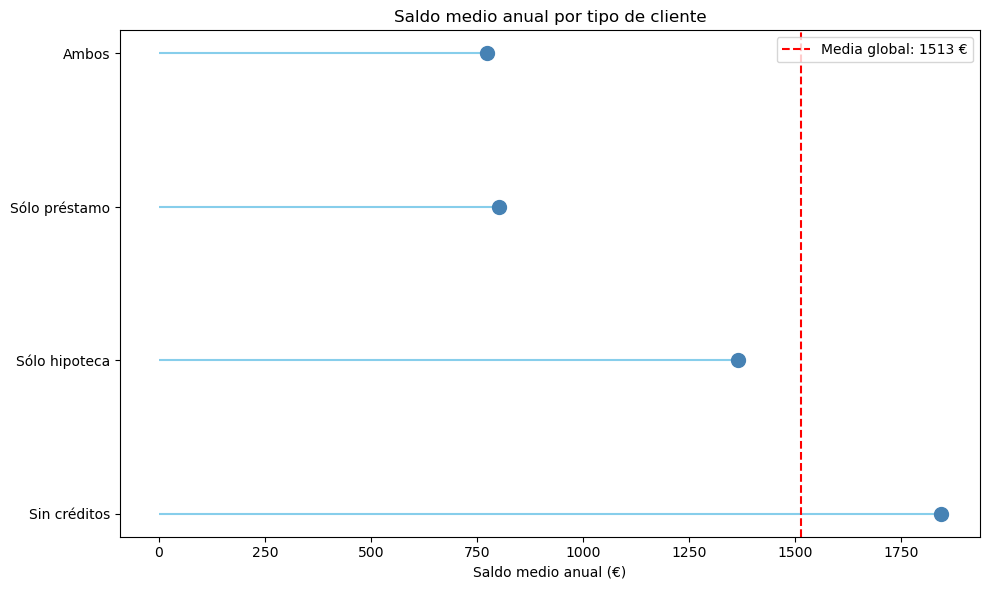

In [12]:
plt.figure(figsize=(10, 6))
plt.hlines(y=df_balance["Tipo de cliente"], xmin=0, xmax=df_balance["Saldo medio anual"], color='skyblue', linestyles='solid')
plt.plot(df_balance["Saldo medio anual"], df_balance["Tipo de cliente"], "o", markersize=10, color='steelblue')
plt.axvline(saldo_medio_global, color='red', linestyle='--', label=f"Media global: {saldo_medio_global} ‚Ç¨")
plt.title("Saldo medio anual por tipo de cliente")
plt.xlabel("Saldo medio anual (‚Ç¨)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

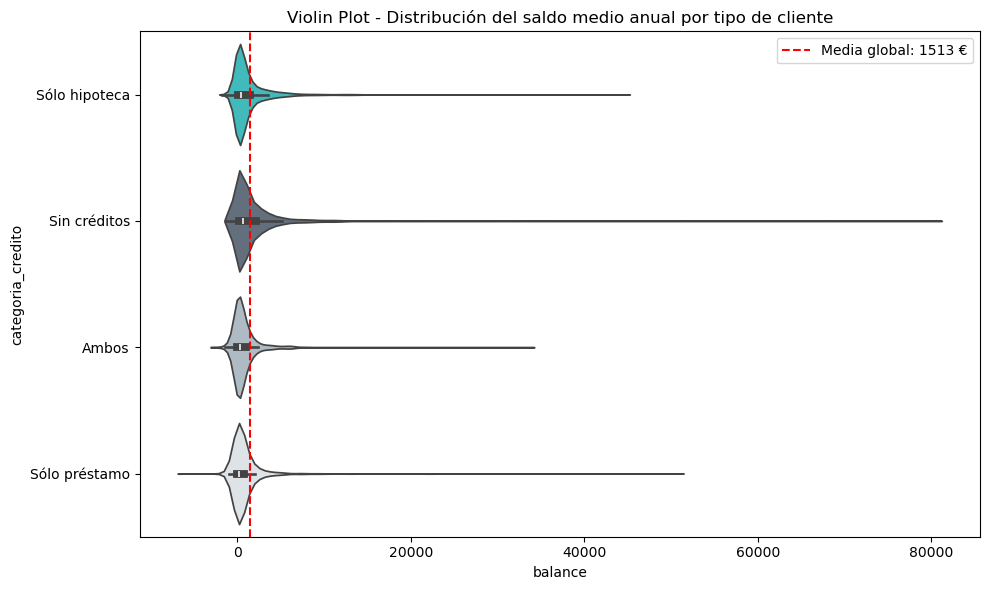

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="balance", y="categoria_credito", palette=custom_palette[:4], cut=0)
plt.axvline(saldo_medio_global, color='red', linestyle='--', label=f"Media global: {saldo_medio_global} ‚Ç¨")
plt.title("Violin Plot - Distribuci√≥n del saldo medio anual por tipo de cliente")
plt.tight_layout()
plt.legend()
plt.show()

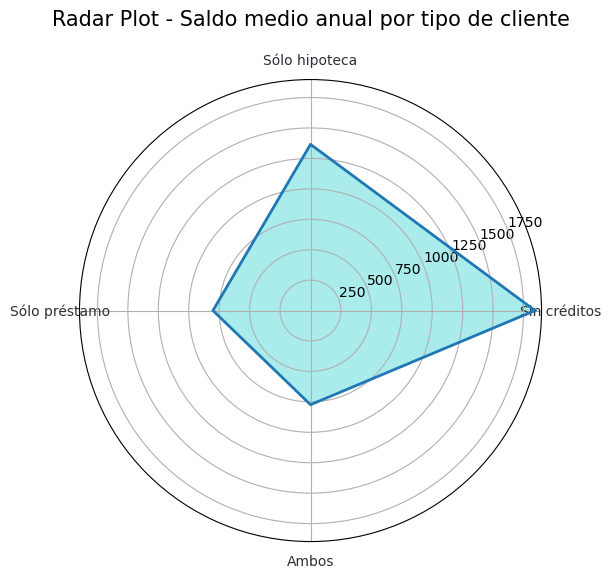

In [14]:
from math import pi

categories = df_balance["Tipo de cliente"].tolist()
values = df_balance["Saldo medio anual"].tolist()
values += values[:1]  # cerrar el radar

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='#2E2F36', size=10)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, '#2CCED1', alpha=0.4)
plt.title("Radar Plot - Saldo medio anual por tipo de cliente", size=15, y=1.1)
plt.show()

In [15]:
print(df.info())
print(df['categoria_credito'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         16163 non-null  int64 
 1   id                 16163 non-null  int64 
 2   age                16163 non-null  int64 
 3   job                16163 non-null  object
 4   marital            16163 non-null  object
 5   education          16163 non-null  object
 6   default            16163 non-null  bool  
 7   balance            16163 non-null  int64 
 8   housing            16163 non-null  bool  
 9   loan               16163 non-null  bool  
 10  contact            16163 non-null  object
 11  day                16163 non-null  int64 
 12  month              16163 non-null  object
 13  duration           16163 non-null  int64 
 14  campaign           16163 non-null  int64 
 15  pdays              16163 non-null  int64 
 16  previous           16163 non-null  int64

- *Clientes sin cr√©ditos tienen el saldo medio anual m√°s alto (alrededor de 1850‚ÄØ‚Ç¨)*
- *Clientes con s√≥lo hipoteca tienen un saldo medio intermedio (aproximadamente 1350‚ÄØ‚Ç¨)*
- *Clientes con s√≥lo pr√©stamo y clientes con pr√©stamo e hipoteca (ambos) tienen los saldos m√°s bajos (por debajo de 800‚ÄØ‚Ç¨)*

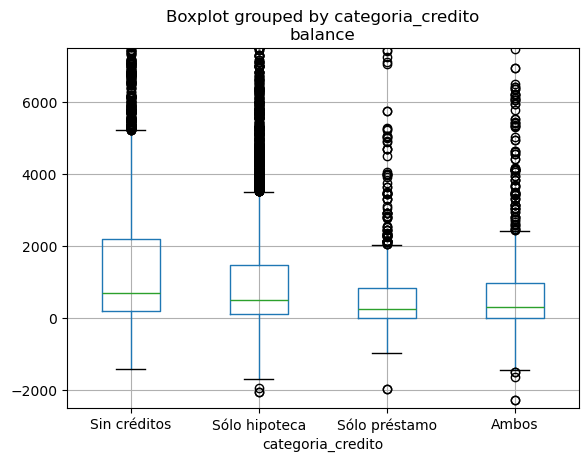

In [16]:
orden_categorias = ['Sin cr√©ditos', 'S√≥lo hipoteca', 'S√≥lo pr√©stamo', 'Ambos']

# Asegura que la columna en df es categ√≥rica y ordenada
df['categoria_credito'] = pd.Categorical(df['categoria_credito'], categories=orden_categorias, ordered=True)

df.boxplot(column='balance', by='categoria_credito')
plt.ylim(-2500, 7500)
plt.show()

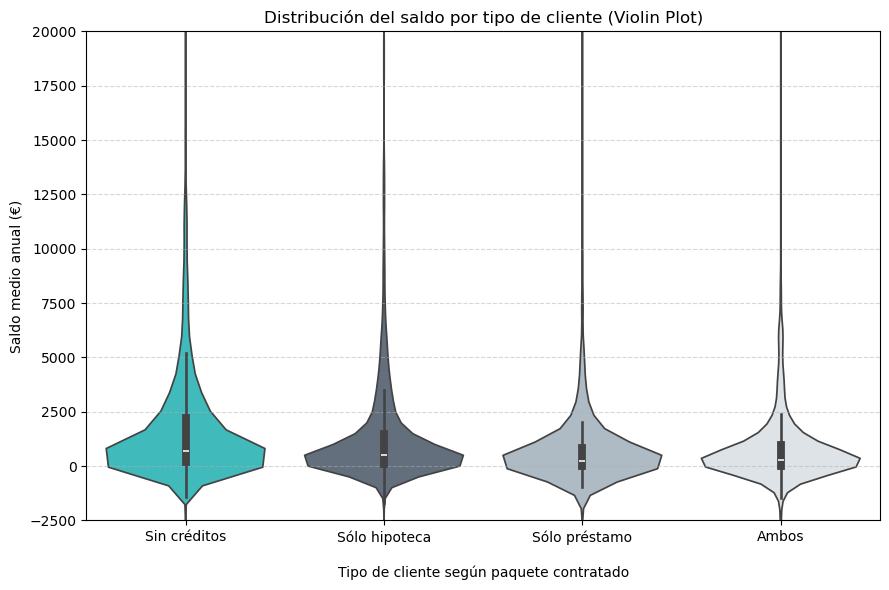

In [17]:
# Aseguramos orden y tipo categ√≥rico
orden_categorias = ['Sin cr√©ditos', 'S√≥lo hipoteca', 'S√≥lo pr√©stamo', 'Ambos']
df['categoria_credito'] = pd.Categorical(df['categoria_credito'], categories=orden_categorias, ordered=True)

# Violinplot con est√©tica y paleta personalizada
plt.figure(figsize=(9, 6))
sns.violinplot(data=df, x='categoria_credito', y='balance', palette=custom_palette[:4], inner='box')

plt.title("Distribuci√≥n del saldo por tipo de cliente (Violin Plot)")
plt.ylabel("Saldo medio anual (‚Ç¨)")
plt.xlabel("Tipo de cliente seg√∫n paquete contratado", labelpad=15)
plt.ylim(-2500, 20000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

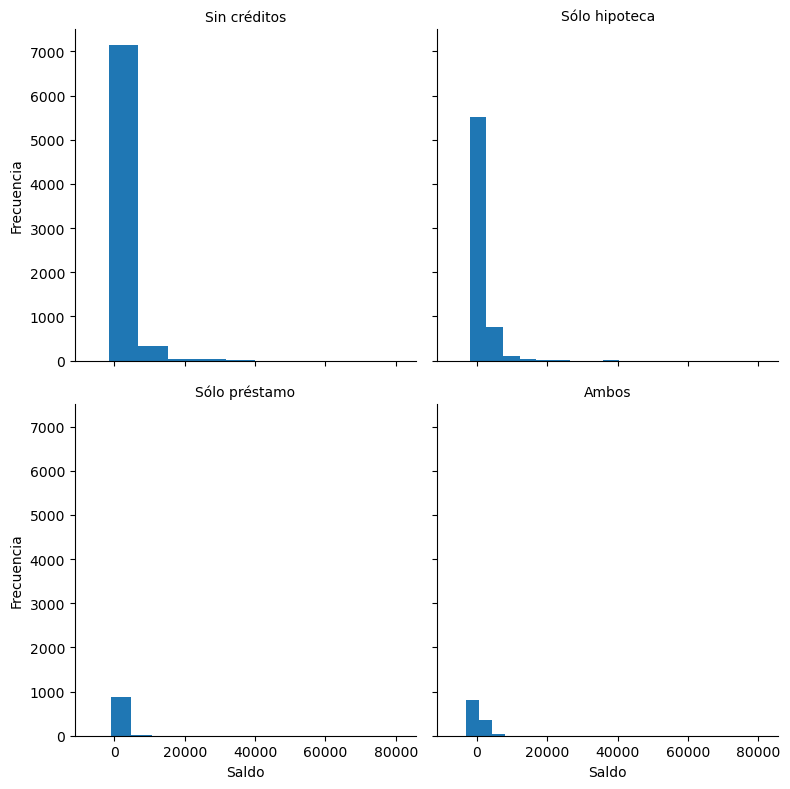

In [18]:
# Facetgrid con histogramas
g = sns.FacetGrid(df, col='categoria_credito', col_wrap=2, height=4, sharex=True, sharey=True)
g.map(plt.hist, 'balance', bins=10)

g.set_titles(col_template='{col_name}')
g.set_axis_labels('Saldo', 'Frecuencia')
plt.tight_layout()
plt.show()

In [19]:
treemap_df = df.groupby("categoria_credito")["balance"].agg(["count", "mean", "sum"]).reset_index()
fig_treemap = px.treemap(treemap_df, 
                         path=["categoria_credito"], 
                         values="count", 
                         color="mean", 
                         color_continuous_scale="RdBu", 
                         title="Distribuci√≥n de Clientes y Saldo Medio por Categor√≠a de Cr√©dito")
fig_treemap.show()

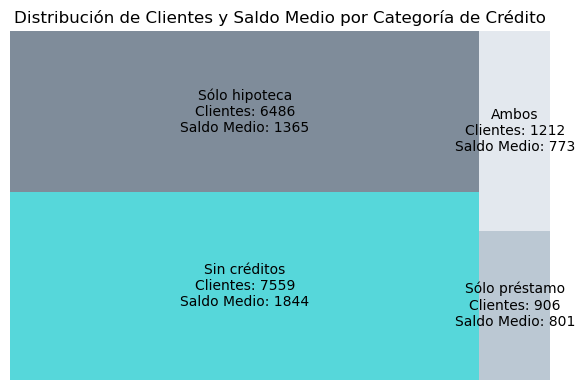

In [20]:
# Preparar los datos para squarify
labels = treemap_df["categoria_credito"].astype(str) + "\n" + \
         "Clientes: " + treemap_df["count"].astype(str) + "\n" + \
         "Saldo Medio: " + treemap_df["mean"].round(0).astype(int).astype(str)

sizes = treemap_df["count"]
colors = treemap_df["mean"]

# Crear el gr√°fico
plt.figure(figsize=(6, 4))
squarify.plot(sizes=sizes, label=labels, color=custom_palette, alpha=0.8)
plt.axis('off')
plt.title("Distribuci√≥n de Clientes y Saldo Medio por Categor√≠a de Cr√©dito")
plt.tight_layout()
plt.show()

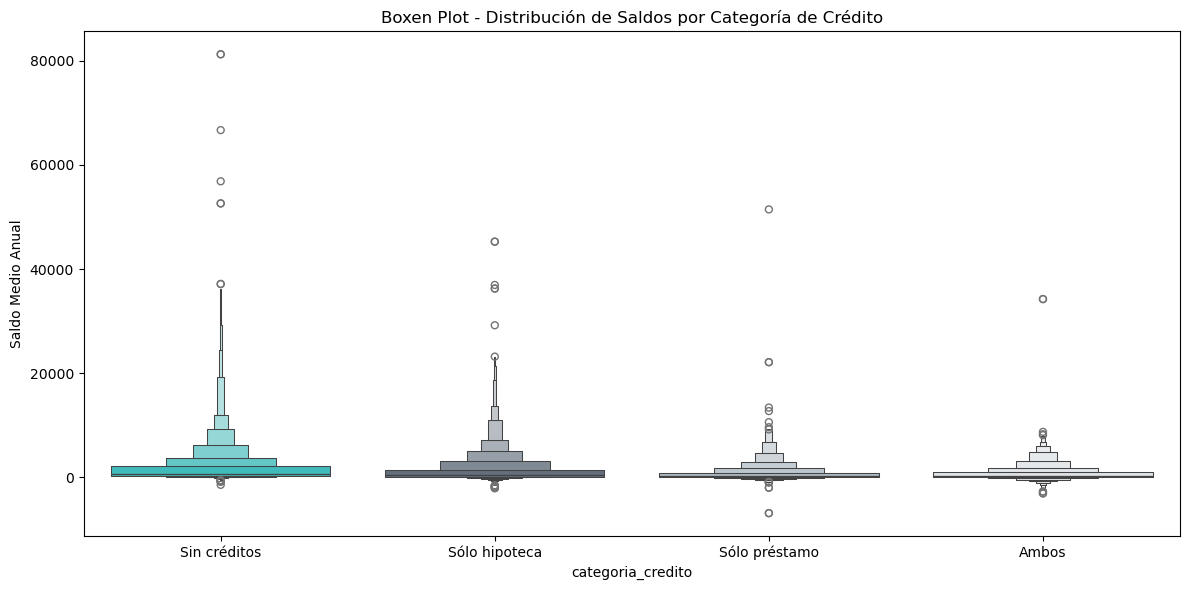

In [21]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x="categoria_credito", y="balance", palette=custom_palette[:4])
plt.title("Boxen Plot - Distribuci√≥n de Saldos por Categor√≠a de Cr√©dito")
plt.ylabel("Saldo Medio Anual")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Obtener los grupos
grupo_sin_creditos = df[df['categoria_credito'] == 'Sin cr√©ditos']['balance']
grupo_solo_hipoteca = df[df['categoria_credito'] == 'S√≥lo hipoteca']['balance']
grupo_solo_prestamo = df[df['categoria_credito'] == 'S√≥lo pr√©stamo']['balance']
grupo_ambos = df[df['categoria_credito'] == 'Ambos']['balance']

# ANOVA (comparar medias de los cuatro grupos)
anova_result = f_oneway(grupo_sin_creditos, grupo_solo_hipoteca, grupo_solo_prestamo, grupo_ambos)

# T-Tests pareados (entre grupos espec√≠ficos)
ttest_1 = ttest_ind(grupo_sin_creditos, grupo_solo_hipoteca, equal_var=False)
ttest_2 = ttest_ind(grupo_sin_creditos, grupo_solo_prestamo, equal_var=False)
ttest_3 = ttest_ind(grupo_sin_creditos, grupo_ambos, equal_var=False)
ttest_4 = ttest_ind(grupo_solo_hipoteca, grupo_solo_prestamo, equal_var=False)
ttest_5 = ttest_ind(grupo_solo_hipoteca, grupo_ambos, equal_var=False)
ttest_6 = ttest_ind(grupo_solo_prestamo, grupo_ambos, equal_var=False)

p_value_significativo = 0.05

resultados = {
    "ANOVA p-value": anova_result.pvalue,
    "T-test Sin cr√©ditos vs S√≥lo hipoteca": ttest_1.pvalue,
    "T-test Sin cr√©ditos vs S√≥lo pr√©stamo": ttest_2.pvalue,
    "T-test Sin cr√©ditos vs Ambos": ttest_3.pvalue,
    "T-test S√≥lo hipoteca vs S√≥lo pr√©stamo": ttest_4.pvalue,
    "T-test S√≥lo hipoteca vs Ambos": ttest_5.pvalue,
    "T-test S√≥lo pr√©stamo vs Ambos": ttest_6.pvalue
}

for nombre, pvalor in resultados.items():
    es_significativo = "Significativo" if pvalor < p_value_significativo else "No significativo"
    print(f"{nombre}: p = {pvalor:.3e} ‚Üí {es_significativo}")

ANOVA p-value: p = 1.723e-46 ‚Üí Significativo
T-test Sin cr√©ditos vs S√≥lo hipoteca: p = 3.116e-19 ‚Üí Significativo
T-test Sin cr√©ditos vs S√≥lo pr√©stamo: p = 6.586e-29 ‚Üí Significativo
T-test Sin cr√©ditos vs Ambos: p = 1.922e-51 ‚Üí Significativo
T-test S√≥lo hipoteca vs S√≥lo pr√©stamo: p = 2.092e-10 ‚Üí Significativo
T-test S√≥lo hipoteca vs Ambos: p = 1.744e-19 ‚Üí Significativo
T-test S√≥lo pr√©stamo vs Ambos: p = 7.742e-01 ‚Üí No significativo


*Resultado*
- Casi todos los grupos tienen diferencias de saldo estad√≠sticamente significativas entre s√≠, excepto:
    - Clientes con "S√≥lo pr√©stamo" vs "Ambos" no muestran diferencias claras ‚Üí sus saldos medios son estad√≠sticamente similares.
    - **Aunque los clientes con hipoteca + p¬¥restamo puedan parecer m√°s endeudados, su saldo anual no es significativamente diferente de los clientes que solo tienen pr√©stamo**
    - **tener hipoteca adicional no implica un saldo m√°s bajo**

Propuestas:
Ya que el impacto de tener una hipoteca adicional no reduce el saldo:
- Ofrecer hipotecas a clientes con pr√©stamo personal sin asumir menor capacidad de pago.
- Ofrecer consolidaci√≥n de deuda o refinanciaci√≥n conjunta a quienes tienen ambos productos.
- No penalizar autom√°ticamente a quienes tienen ambos productos asumiendo sobreendeudamiento.
- Ajustar el modelo de riesgo si el saldo medio y el comportamiento de pagos es similar entre estos dos grupos.

# KPIs

- saldo medio gral
- saldo medio por decil
- % clientes por tasa de riesgo
- % clientes con hipoteca
- % clientes con pr√©stamo
- % clientes con hipoteca + pr√©stamo
- tasa contrataci√≥n dep√≥sito
- tasa incumplimiento
- probabilidad de incumplimiento global

In [23]:
df['month'].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb',
       'Mar', 'Apr', 'Sep'], dtype=object)

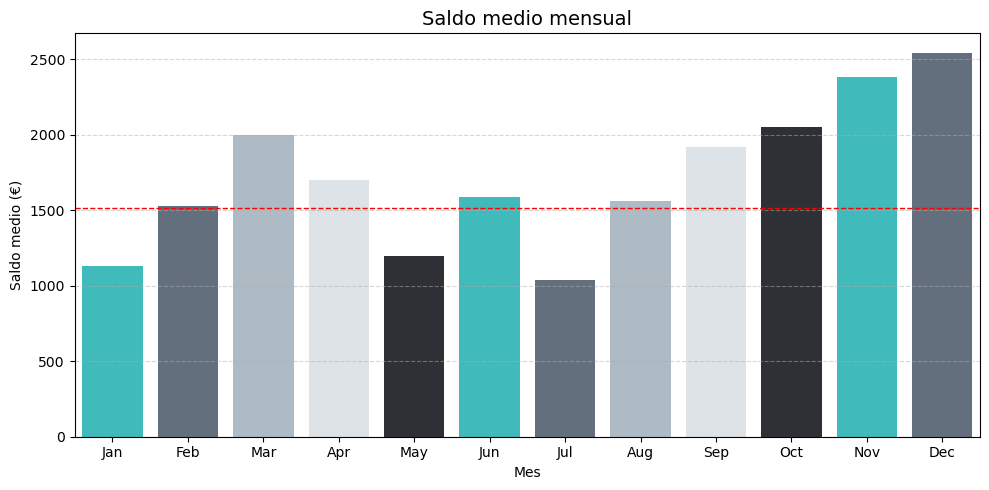

In [24]:
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

saldo_medio_mensual = df['balance'].groupby(df['month']).mean().reset_index()
saldo_medio_mensual['month'] = pd.Categorical(saldo_medio_mensual['month'], categories=orden_meses, ordered=True)
saldo_medio_mensual = saldo_medio_mensual.sort_values('month')

plt.figure(figsize=(10, 5))
sns.barplot(data=saldo_medio_mensual, x='month', y='balance', palette=custom_palette)
plt.axhline(saldo_medio_global, color='red', linestyle='--', linewidth=1, label=f"Media global: {saldo_medio_global} ‚Ç¨")
plt.title("Saldo medio mensual", fontsize=14)
plt.ylabel("Saldo medio (‚Ç¨)")
plt.xlabel("Mes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

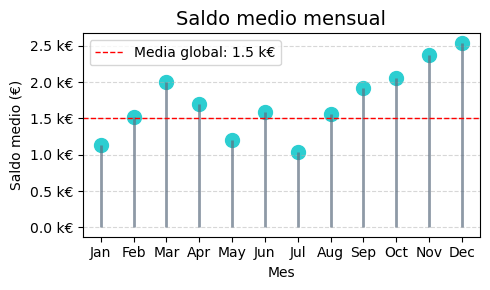

In [25]:
# Funci√≥n para formatear en k‚Ç¨
def euros_k(x, _):
    return f'{x / 1000:.1f} k‚Ç¨'

plt.figure(figsize=(5, 3))

# Dibujamos las l√≠neas verticales
plt.vlines(x=saldo_medio_mensual['month'], ymin=0, ymax=saldo_medio_mensual['balance'], color='#5F6F81', alpha=0.7, linewidth=2)

# Dibujamos los puntos
plt.scatter(x=saldo_medio_mensual['month'], y=saldo_medio_mensual['balance'], color='#2CCED1', s=100)

# L√≠nea de media global (si ya la tienes definida como 'saldo_medio_global')
plt.axhline(saldo_medio_global, color='red', linestyle='--', linewidth=1,
            label=f"Media global: {saldo_medio_global / 1000:.1f} k‚Ç¨")
# Est√©tica
plt.title("Saldo medio mensual", fontsize=14)
plt.ylabel("Saldo medio (‚Ç¨)")
plt.xlabel("Mes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(euros_k))
plt.tight_layout()
plt.legend()
plt.show()

In [26]:
# Saldo medio general
saldo_medio_global = df['balance'].mean()
print(round((saldo_medio_global/1000),1), "k‚Ç¨")

1.5 k‚Ç¨


In [27]:
# % de clientes con hipoteca
con_hipoteca = df['housing'].value_counts().get(True)
total = len(df['housing'])

hipoteca_pct = 100 * con_hipoteca / total
print(f"{hipoteca_pct:.2f}%")

47.63%


In [28]:
# % de clientes con pr√©stamo
con_prestamo = df['loan'].value_counts().get(True)
total = len(df['loan'])

prestamo_pct = 100 * con_prestamo / total
print(f"{prestamo_pct:.2f}%")

13.10%


In [29]:
# % de clientes con ambos
con_ambos = len(df[df['loan'] & df['housing']])
total = len(df)

ambos_pct = 100 * con_ambos / total
print(f"{ambos_pct:.2f}%")

7.50%


In [30]:
# % contratacion deposito
contratan = df['deposit'].value_counts().get(True)
total = len(df['deposit'])

deposito_pct = 100 * contratan / total
print(f"{deposito_pct:.2f}%")

47.71%


In [31]:
# % de incumplimiento global
pd_global = df['default'].mean()
print("PD global =", (pd_global*100).round(2), "%")

PD global = 1.49 %


In [32]:
# Crear deciles y calcular m√©tricas de riesgo
df['balance_decile'] = pd.qcut(df['balance'], q=10, labels=False)
default_rates = (
    df.groupby('balance_decile')['default']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'default', 'count': 'clientes'})
)
default_rates['balance_decile'] += 1
default_rates['default'] = default_rates['default'].round(4)
default_rates['indice_riesgo'] = (default_rates['default'] / pd_global).round(2)

# Calcular porcentaje de clientes por decil
clientes_totales = len(df)
default_rates['porcentaje_clientes'] = (default_rates['clientes'] / clientes_totales * 100).round(2)

# Clasificar nivel de riesgo
def categorize_risk(rate):
    return (
        'Muy alto' if rate > 0.10 else
        'Alto'     if rate > 0.05 else
        'Moderado' if rate > 0.02 else
        'Bajo'
    )

default_rates['risk_level'] = default_rates['default'].apply(categorize_risk)

# Porcentaje de clientes por categor√≠a de riesgo
porcentaje_riesgo = (
    default_rates.groupby('risk_level')['porcentaje_clientes']
    .sum()
    .reindex(['Muy alto', 'Alto', 'Moderado', 'Bajo'])
    .reset_index()
)
porcentaje_riesgo['porcentaje_clientes'] = porcentaje_riesgo['porcentaje_clientes'].fillna(0).astype(int)
porcentaje_riesgo

risk_level  porcentaje_clientes
0   Muy alto                    0
1       Alto                   13
2   Moderado                    6
3       Bajo                   79

# Regresi√≥n lineal para ver c√≥mo afectan `housing` y `loan` al `balance`

In [33]:
# Copia de las columnas del df que voy a necesitar
df2 = df[['id','default', 'balance', 'housing', 'loan']].copy()
df2.head()

id  default  balance  housing   loan
0   1    False     2343     True  False
1   2    False     2343     True  False
2   3    False       45    False  False
3   4    False     1270     True  False
4   5    False     2476     True  False

In [34]:
# Convierto los booleanos a variables binarias
df2[['default', 'housing', 'loan']].astype(int)

default  housing  loan
0            0        1     0
1            0        1     0
2            0        0     0
3            0        1     0
4            0        1     0
...        ...      ...   ...
16158        0        0     0
16159        0        1     0
16160        1        1     0
16161        0        0     0
16162        0        1     0

[16163 rows x 3 columns]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
# Definir variables predictoras y objetivo
X = df2[['housing', 'loan']].astype(int)
y = df2['balance']

# Separar datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes
pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

Variable  Coeficiente
0  housing  -420.579545
1     loan  -791.195527

Cada variable tiene un coeficiente que indica el impacto que tienen sobre la variable dependiente (`balance`).
- Housing: -420,6 ‚Ç¨
    > Tener hipoteca se asocia con un saldo anual promedio de unos 420‚Ç¨ menos que no tenerla
- Loan: 791,2 ‚Ç¨
    > Tener un pr√©stamos personal se asocia con un saldo anual promedio 791‚Ç¨ menos

In [37]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2_manual = r2_score(y, y_pred)
print(f"R¬≤ manual: {r2_manual:.4f}")

R¬≤ manual: 0.0127


Del valor de R2 podemos obtener que este modelo solo explica el 1,27% de los datos, pero no explica la estad√≠stica

In [38]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                balance   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              552.3
Date:                Tue, 27 May 2025   Prob (F-statistic):                   9.71e-233
Time:                        11:34:48   Log-Likelihood:                     -1.5417e+05
No. Observations:               16163   AIC:                                  3.083e+05
Df Residuals:                   16161   BIC:                                  3.084e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Prob (F-statistic): si es < 0.05, significa que al menos una variable del modelo es significativa.